In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
## 1. Data Wrangling

# Load the dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [5]:
# Check for missing values
print("Missing Values:")
print(df.isna().sum())
print(df.notna().sum())

Missing Values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [6]:
# Check data types and general structure
print("\nData Overview:")
print(df.info())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [7]:
scaler = MinMaxScaler()
df['Normalized_Sales_Data'] = scaler.fit_transform(df[['Sales']])

print("\nNormalized Sales Data:")
print(df[['Sales', 'Normalized_Sales_Data']].head())


Normalized Sales Data:
   Sales  Normalized_Sales_Data
0  20000               0.095238
1  20000               0.095238
2  10000               0.031746
3  37500               0.206349
4   7500               0.015873


In [8]:
grouped_data = df.groupby(['Group', 'State']).agg({
    'Sales': ['sum', 'mean'],
    'Unit': ['sum', 'median']
}).reset_index()

print("\nGrouped Data Analysis:")
print(grouped_data.head())


Grouped Data Analysis:
   Group State     Sales                Unit       
                     sum          mean   sum median
0   Kids   NSW  18587500  68842.592593  7435   28.0
1   Kids    NT   5700000  21111.111111  2280    8.0
2   Kids   QLD   8510000  31518.518519  3404   12.0
3   Kids    SA  14515000  53759.259259  5806   21.0
4   Kids   TAS   5775000  21388.888889  2310    8.0


In [9]:
## 2. Data Analysis

sales_stats = df['Sales'].describe()
units_stats = df['Unit'].describe()

print("Sales Statistics:")
print(sales_stats)

print("\nUnits Statistics:")
print(units_stats)

Sales Statistics:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Units Statistics:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [10]:
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()

print(f"\nHighest Sales Group: {highest_sales_group}")
print(f"Lowest Sales Group: {lowest_sales_group}")


Highest Sales Group:  Men
Lowest Sales Group:  Seniors


In [11]:
print(f"\nHighest Sales Group: {highest_sales_group}")
print(f"Lowest Sales Group: {lowest_sales_group}")


Highest Sales Group:  Men
Lowest Sales Group:  Seniors


In [12]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Weekly Sales Report
weekly_sales = df.resample('W', on='Date')['Sales'].sum()
print("\nWeekly Sales:")
print(weekly_sales)

# Monthly Sales Report
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
print("\nMonthly Sales:")
print(monthly_sales)


Weekly Sales:
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Sales:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


In [13]:
# Convert 'Date' column to datetime format for time-based analysis
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")

# Extract week, month, and quarter for grouping
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter

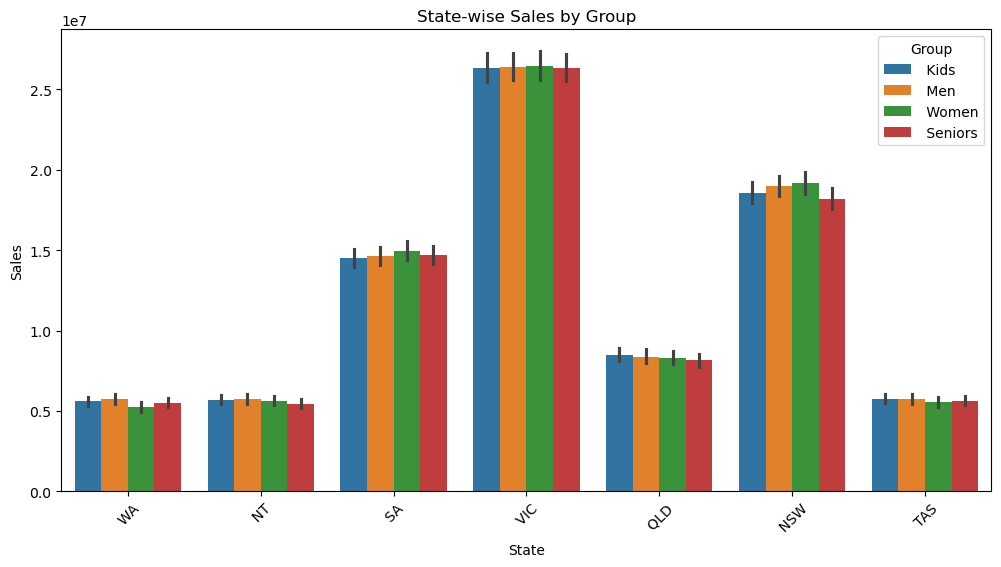

In [14]:
## 3. Data Visualization

# State wise sales plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=sum)
plt.title("State-wise Sales by Group")
plt.xticks(rotation=45)
plt.show()

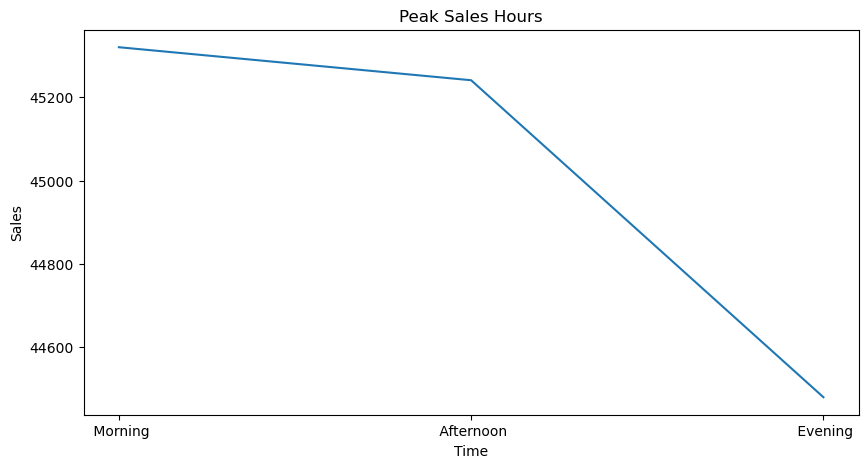

In [22]:
# Peak Sales Hours plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Time', y='Sales', errorbar=None)
plt.title("Peak Sales Hours")
plt.show()

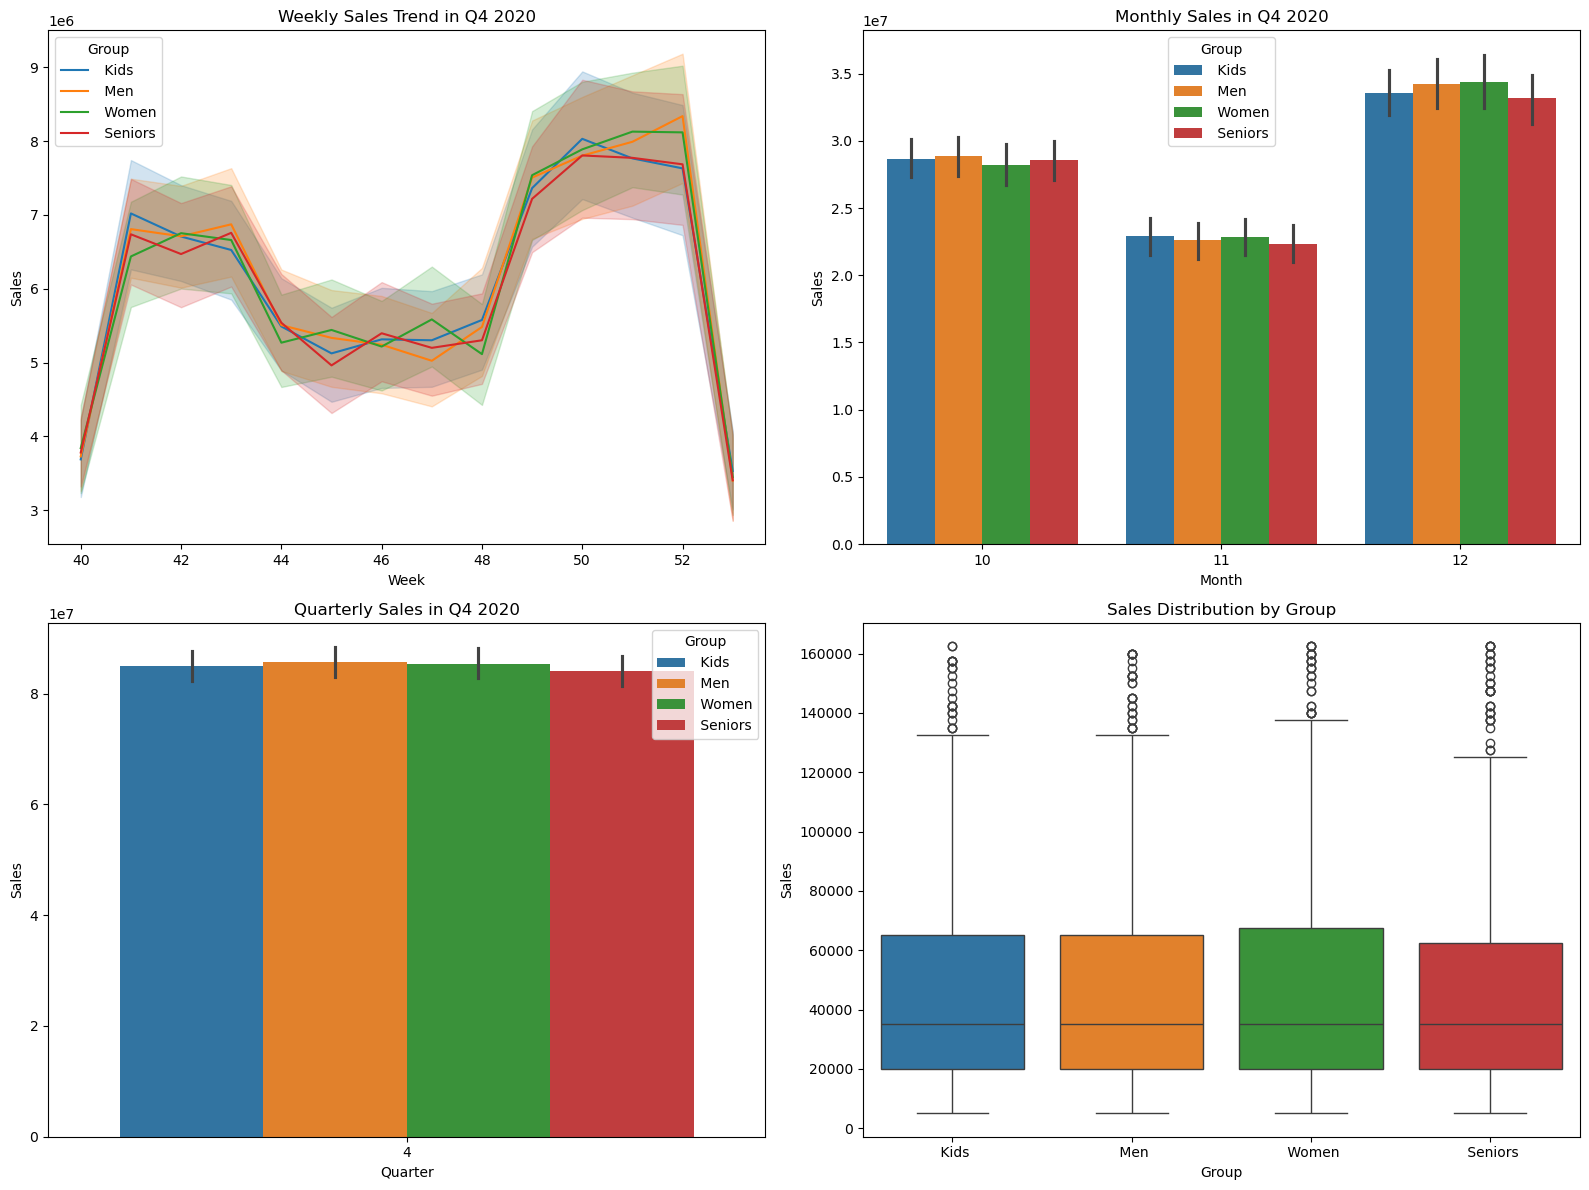

In [23]:
# Create subplots for time-based sales analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Weekly Sales Plot
sns.lineplot(ax=axes[0,0], data=df, x='Week', y='Sales', hue='Group', estimator=sum)
axes[0,0].set_title("Weekly Sales Trend in Q4 2020")

# Monthly Sales Plot
sns.barplot(ax=axes[0,1], data=df, x='Month', y='Sales', hue='Group', estimator=sum)
axes[0,1].set_title("Monthly Sales in Q4 2020")

# Quarterly Sales Plot
sns.barplot(ax=axes[1,0], data=df, x='Quarter', y='Sales', hue='Group', estimator=sum)
axes[1,0].set_title("Quarterly Sales in Q4 2020")

# Boxplot for Sales Distribution
sns.boxplot(ax=axes[1,1], data=df, x='Group', y='Sales', hue='Group')
axes[1,1].set_title("Sales Distribution by Group")

plt.tight_layout()
plt.show()